# 📊 Sentiment Analysis with Machine Learning and Deep Learning

This notebook demonstrates sentiment analysis on Arabic/Darija text using multiple approaches:

## 🎯 Objectives
- Implement and compare traditional ML algorithms (SVM, KNN, Naive Bayes)
- Build deep learning models (Bidirectional LSTM, CNN)
- Preprocess Arabic/Darija text data
- Evaluate and compare model performance

## 📋 Workflow
1. **Data Loading & Exploration**
2. **Text Preprocessing**
3. **Feature Extraction**
4. **Traditional ML Models**
5. **Deep Learning Models**
6. **Model Comparison & Evaluation**

In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import emoji
# Ensure NLTK stopwords are downloaded
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

c:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📁 Data Loading and Exploration

Load the sentiment analysis dataset and stopwords file. The dataset contains sentences with their corresponding polarity labels.

In [2]:
df = pd.read_csv('DATA_CLEANED.csv', header=0,names=['sentence','polarity'],encoding='utf-16')

In [3]:
df.head()

,sentence,polarity
0,انسان عبارة عن دواء للإكتئاب❤🎤,1
1,نحبك يا فنان وااااااحسااااااااان❤,1
2,Stream zuin😂 Thank you ilyas ❤️🫶,1
3,وحق الرب الى دوا د الاكتئاب الأسطورة❤️❤️❤️❤️😂,1
4,اسطورة بكل ما تحمل الكلمة من معنى ❤,1


In [4]:
stopwords_df = pd.read_csv('Stop_words .csv', header=None, names=['stopword'],encoding='utf-16')
darija_stopwords = set(stopwords_df['stopword'])
arabic_stopwords = set(stopwords.words('arabic'))
#union darija with arabic stop words
stopwords = darija_stopwords.union(arabic_stopwords)

In [5]:
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F]"  # emoticons
    "|[\U0001F300-\U0001F5FF]"  # symbols & pictographs
    "|[\U0001F680-\U0001F6FF]"  # transport & map symbols
    "|[\U0001F1E0-\U0001F1FF]"  # flags (iOS)
    "|[\U00002702-\U000027B0]"  # other symbols
    "|[\U000024C2-\U0001F251]"  # enclosed characters
    "+", flags=re.UNICODE)

### Text Cleaning Function
Comprehensive text preprocessing function that:
- Removes HTML tags
- Normalizes Arabic text and removes diacritics
- Handles emoji normalization
- Removes numbers and repetitive characters
- Tokenizes and removes stopwords

In [6]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    #Normalize Arabic text
    # Remove Harakat (diacritics)
    text = re.sub(r'[\u064B-\u0652]', '', text)
    # Normalize different forms of Arabic letters
    text = re.sub(r'[أإآ]', 'ا', text)  # Normalize 'أ', 'إ', 'آ' to 'ا'
    text = re.sub(r'ُ|ُ|ٰ|ۥ', 'و', text)  
     # Remove numbers
    text = re.sub(r'\d+', '', text)
     
    
    # Remove repetitive letters 
    text = re.sub(r'(.)\1+', r'\1\1', text)
    #remove repetitive emojies to only one emoji
    text = emoji_pattern.sub(lambda x: x.group(0)[0], text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords]

    return ' '.join(filtered_tokens)


In [7]:
df['cleaned_sentence'] = df['sentence'].apply(clean_text)

In [8]:
# Display the cleaned dataset
df.head()


,sentence,polarity,cleaned_sentence
0,انسان عبارة عن دواء للإكتئاب❤🎤,1,انسان عبارة دواء للاكتئاب❤🎤
1,نحبك يا فنان وااااااحسااااااااان❤,1,نحبك فنان وااحساان❤
2,Stream zuin😂 Thank you ilyas ❤️🫶,1,Stream zuin😂 Thank you ilyas ❤️🫶
3,وحق الرب الى دوا د الاكتئاب الأسطورة❤️❤️❤️❤️😂,1,وحق الرب الى دوا الاكتئاب الاسطورة❤️😂
4,اسطورة بكل ما تحمل الكلمة من معنى ❤,1,اسطورة بكل تحمل الكلمة معنى ❤


In [9]:
# Optionally, save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [10]:
df['polarity']=df['polarity'].astype(int)

In [11]:
df['polarity']=df['polarity'].replace(-1,0)

In [12]:
df['polarity'].unique()

array([1, 0])

## 🔍 Feature Extraction and Data Preparation

Transform text data into numerical features using TF-IDF vectorization and split the dataset for training and testing.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC


In [14]:
# Separate features and labels
X = df['cleaned_sentence']
y = df['polarity']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# 🤖 Traditional Machine Learning Models

## 1. Support Vector Machine (SVM)
Train and evaluate an SVM model with linear kernel for sentiment classification.

In [15]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, gamma='scale')  
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# Make predictions
y_pred_test = svm_model.predict(X_test)
y_pred_train=svm_model.predict(X_train)
# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train=accuracy_score(y_train,y_pred_train)
svm_report_test=classification_report(y_test, y_pred_test,output_dict=True)
svm_report_train=classification_report(y_train, y_pred_train,output_dict=True)

In [17]:
print('test Set')
print(f'Accuracy: {accuracy_test:.2f}')
print('Classification Report:')
print(svm_report_test)
print('train Set')
print(f'Accuracy: {accuracy_train:.2f}')
print('Classification Report:')
print(svm_report_train)

test Set
Accuracy: 0.81
Classification Report:
{'0': {'precision': 0.8699154248892469, 'recall': 0.7260504201680672, 'f1-score': 0.7914987174789301, 'support': 2975}, '1': {'precision': 0.7681365576102418, 'recall': 0.8931524975190208, 'f1-score': 0.8259406546344449, 'support': 3023}, 'accuracy': 0.81027009003001, 'macro avg': {'precision': 0.8190259912497444, 'recall': 0.8096014588435441, 'f1-score': 0.8087196860566874, 'support': 5998}, 'weighted avg': {'precision': 0.8186187400302218, 'recall': 0.81027009003001, 'f1-score': 0.808857499743205, 'support': 5998}}
train Set
Accuracy: 0.95
Classification Report:
{'0': {'precision': 0.9805517865219358, 'recall': 0.926891834117144, 'f1-score': 0.9529670329670329, 'support': 7017}, '1': {'precision': 0.9302989130434782, 'recall': 0.9815080275229358, 'f1-score': 0.9552176339285714, 'support': 6976}, 'accuracy': 0.9541199171014079, 'macro avg': {'precision': 0.955425349782707, 'recall': 0.95419993082004, 'f1-score': 0.9540923334478022, 'suppo

In [18]:
results=[]
results.append({
        'Model': 'SVM',
        'Accuracy': accuracy_test,
        'Precision': svm_report_test['weighted avg']['precision'],
        'Recall': svm_report_test['weighted avg']['recall'],
        'F1-Score': svm_report_test['weighted avg']['f1-score']
    })

In [19]:
def predict_sentiment(sentence):
    sentence=clean_text(sentence)
    sentence_vectorized = vectorizer.transform([sentence])
    prediction = svm_model.predict(sentence_vectorized)
    return prediction[0]

In [20]:
import joblib
 #Save the model to a file
model_filename = 'svm_sentiment.pkl'
joblib.dump(svm_model, model_filename)

['svm_sentiment.pkl']

In [21]:
# Save the vectorizer
vectorizer_filename = 'tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)


['tfidf_vectorizer.pkl']

## 2. K-Nearest Neighbors (KNN)
Implement KNN classifier for sentiment analysis with k=5 neighbors.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [24]:
y_pred_test = knn.predict(X_test)

# Evaluate the model
accuracy_test_knn = accuracy_score(y_test, y_pred_test)
knn_report_test = classification_report(y_test, y_pred_test,output_dict=True)

print(f'Accuracy: {accuracy_test}')
print(knn_report_test)

c:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.81027009003001
{'0': {'precision': 0.6456824512534819, 'recall': 0.3895798319327731, 'f1-score': 0.4859538784067087, 'support': 2975}, '1': {'precision': 0.5679276707113966, 'recall': 0.7896129672510751, 'f1-score': 0.6606698034874066, 'support': 3023}, 'accuracy': 0.5911970656885629, 'macro avg': {'precision': 0.6068050609824392, 'recall': 0.5895963995919241, 'f1-score': 0.5733118409470577, 'support': 5998}, 'weighted avg': {'precision': 0.606493938152661, 'recall': 0.5911970656885629, 'f1-score': 0.5740109376796246, 'support': 5998}}


In [25]:
y_pred_train = knn.predict(X_train)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
knn_report_train = classification_report(y_train, y_pred_train,output_dict=True)

print(f'Accuracy: {accuracy_train}')
print(knn_report_train)


c:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.7362252554848853
{'0': {'precision': 0.8348771647200967, 'recall': 0.5908507909362976, 'f1-score': 0.6919803054326963, 'support': 7017}, '1': {'precision': 0.6819541375872383, 'recall': 0.882454128440367, 'f1-score': 0.7693557457976629, 'support': 6976}, 'accuracy': 0.7362252554848853, 'macro avg': {'precision': 0.7584156511536675, 'recall': 0.7366524596883323, 'f1-score': 0.7306680256151796, 'support': 13993}, 'weighted avg': {'precision': 0.7586396861751942, 'recall': 0.7362252554848853, 'f1-score': 0.7305546691850016, 'support': 13993}}


In [26]:
results.append({
        'Model': 'KNN',
        'Accuracy': accuracy_test_knn,
        'Precision': knn_report_test['weighted avg']['precision'],
        'Recall': knn_report_test['weighted avg']['recall'],
        'F1-Score': knn_report_test['weighted avg']['f1-score']
    })

## 3. Naive Bayes
Implement Multinomial Naive Bayes classifier for sentiment analysis.

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
nb_model = MultinomialNB(alpha=1)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [29]:
#make predictions
y_pred_test = nb_model.predict(X_test)
y_pred_train = nb_model.predict(X_train)

In [30]:
#evaluate
accuracy_test_nb = accuracy_score(y_test, y_pred_test)
accuracy_train_nb = accuracy_score(y_train, y_pred_train)
nb_report_test = classification_report(y_test, y_pred_test,output_dict=True)
nb_report_train = classification_report(y_train, y_pred_train,output_dict=True)

In [31]:
#print
print(f'Accuracy: {accuracy_test_nb}')
print(nb_report_test)
print(f'Accuracy: {accuracy_train_nb}')
print(nb_report_train)

Accuracy: 0.800433477825942
{'0': {'precision': 0.7916666666666666, 'recall': 0.8110924369747899, 'f1-score': 0.8012618296529967, 'support': 2975}, '1': {'precision': 0.8094915254237288, 'recall': 0.7899437644723785, 'f1-score': 0.7995981918633852, 'support': 3023}, 'accuracy': 0.800433477825942, 'macro avg': {'precision': 0.8005790960451977, 'recall': 0.8005181007235842, 'f1-score': 0.800430010758191, 'support': 5998}, 'weighted avg': {'precision': 0.8006504192546291, 'recall': 0.800433477825942, 'f1-score': 0.8004233539881093, 'support': 5998}}
Accuracy: 0.924104909597656
{'0': {'precision': 0.9074859723552757, 'recall': 0.9449907367821007, 'f1-score': 0.9258586986875175, 'support': 7017}, '1': {'precision': 0.9422674244690398, 'recall': 0.9030963302752294, 'f1-score': 0.922266139657444, 'support': 6976}, 'accuracy': 0.924104909597656, 'macro avg': {'precision': 0.9248766984121577, 'recall': 0.924043533528665, 'f1-score': 0.9240624191724807, 'support': 13993}, 'weighted avg': {'preci

In [32]:
results.append({
        'Model': 'NB',
        'Accuracy': accuracy_test_nb,
        'Precision': nb_report_test['weighted avg']['precision'],
        'Recall': nb_report_test['weighted avg']['recall'],
        'F1-Score': nb_report_test['weighted avg']['f1-score']
    })

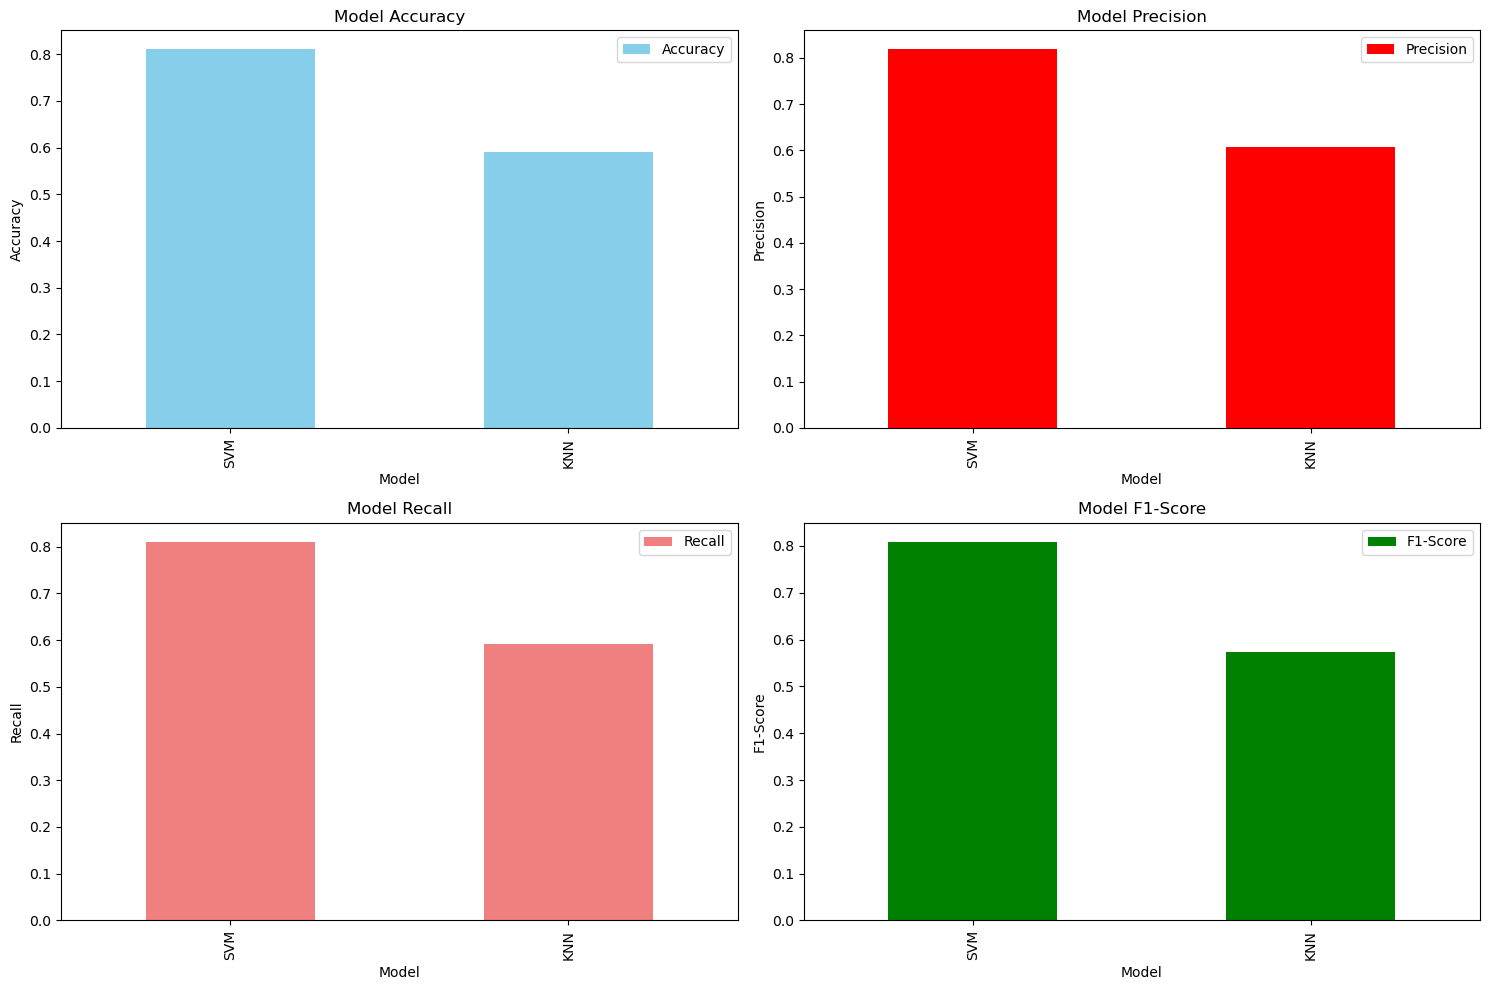

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
df_results=pd.DataFrame(results)
df_results.plot(kind='bar', x='Model', y='Accuracy', ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Model Accuracy')
ax[0, 0].set_ylabel('Accuracy')

# Precision
df_results.plot(kind='bar', x='Model', y='Precision', ax=ax[0, 1], color='red')
ax[0, 1].set_title('Model Precision')
ax[0, 1].set_ylabel('Precision')

# Recall
df_results.plot(kind='bar', x='Model', y='Recall', ax=ax[1, 0], color='lightcoral')
ax[1, 0].set_title('Model Recall')
ax[1, 0].set_ylabel('Recall')

# F1-Score
df_results.plot(kind='bar', x='Model', y='F1-Score', ax=ax[1, 1], color='green')
ax[1, 1].set_title('Model F1-Score')
ax[1, 1].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()

# 🧠 Deep Learning Models

Now we'll implement and compare deep learning models for sentiment analysis. These models can capture more complex patterns in the text data.

## 🔧 Deep Learning Data Preparation
Prepare data specifically for deep learning models with tokenization and sequence padding.

In [34]:
sentences=df['cleaned_sentence'].values
labels=df['polarity'].values
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences,labels)

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras

In [36]:
# Hyperparameters of the model
vocab_size = 3000 
oov_tok = ''
embedding_dim = 100
max_length = 200 
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

### Test Data Preparation
Prepare test sequences for model evaluation.

In [37]:
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

## 1. Bidirectional LSTM Model
Build and train a Bidirectional LSTM neural network for sentiment classification.

In [38]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
    keras.layers.Dropout(0.5),  # Dropout after LSTM layer
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout after Dense layer
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0

In [39]:
from keras.callbacks import ModelCheckpoint

In [40]:
# Define the checkpoint callback
checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

# Train the model with the checkpoint callback
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[checkpoint])


Epoch 1/5
422/422 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.8091
Epoch 1: val_loss improved from -inf to 0.26820, saving model to best_model.h5
422/422 [==============================] - 257s 572ms/step - loss: 0.3988 - accuracy: 0.8091 - val_loss: 0.2682 - val_accuracy: 0.8867
Epoch 2/5
422/422 [==============================] - ETA: 0s - loss: 0.2459 - accuracy: 0.8990
Epoch 2: val_loss improved from 0.26820 to 0.27148, saving model to best_model.h5
422/422 [==============================] - 157s 373ms/step - loss: 0.2459 - accuracy: 0.8990 - val_loss: 0.2715 - val_accuracy: 0.8860
Epoch 3/5
422/422 [==============================] - ETA: 0s - loss: 0.2095 - accuracy: 0.9130
Epoch 3: val_loss improved from 0.27148 to 0.29107, saving model to best_model.h5
422/422 [==============================] - 157s 372ms/step - loss: 0.2095 - accuracy: 0.9130 - val_loss: 0.2911 - val_accuracy: 0.8860
Epoch 4/5
422/422 [==============================] - ETA: 0s - loss

In [42]:
bilstm_acc=history.history['val_accuracy'][-1]

In [43]:
from tensorflow.keras import layers, models

## 2. Convolutional Neural Network (CNN)
Build and train a CNN model for sentiment classification using 1D convolution layers.

In [44]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [45]:
cnn_model = models.Sequential()
cnn_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
cnn_model.add(layers.Conv1D(128, 5, activation='relu'))
cnn_model.add(layers.MaxPooling1D(pool_size=2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(24, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile CNN Model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN Model
cnn_history = cnn_model.fit(train_padded, train_labels, 
                            epochs=num_epochs, 
                            validation_split=0.1, 
                            callbacks=[checkpoint])

Epoch 1/5
422/422 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.8057
Epoch 1: val_loss improved from inf to 0.25383, saving model to best_model.h5
422/422 [==============================] - 33s 75ms/step - loss: 0.3868 - accuracy: 0.8057 - val_loss: 0.2538 - val_accuracy: 0.8873
Epoch 2/5
422/422 [==============================] - ETA: 0s - loss: 0.2144 - accuracy: 0.9071
Epoch 2: val_loss improved from 0.25383 to 0.24409, saving model to best_model.h5
422/422 [==============================] - 32s 75ms/step - loss: 0.2144 - accuracy: 0.9071 - val_loss: 0.2441 - val_accuracy: 0.8940
Epoch 3/5
422/422 [==============================] - ETA: 0s - loss: 0.1645 - accuracy: 0.9297
Epoch 3: val_loss did not improve from 0.24409
422/422 [==============================] - 33s 78ms/step - loss: 0.1645 - accuracy: 0.9297 - val_loss: 0.2924 - val_accuracy: 0.8887
Epoch 4/5
422/422 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9423
Epoch 4: val_l

## 📈 Deep Learning Model Evaluation and Comparison

Extract validation accuracies and compare the performance of CNN vs Bidirectional LSTM models.

In [49]:
cnn_val_acc = cnn_history.history['val_accuracy'][-1]
bilstm_acc=history.history['val_accuracy'][-1]

In [51]:
print(cnn_val_acc,bilstm_acc)

0.8799999952316284 0.8766666650772095


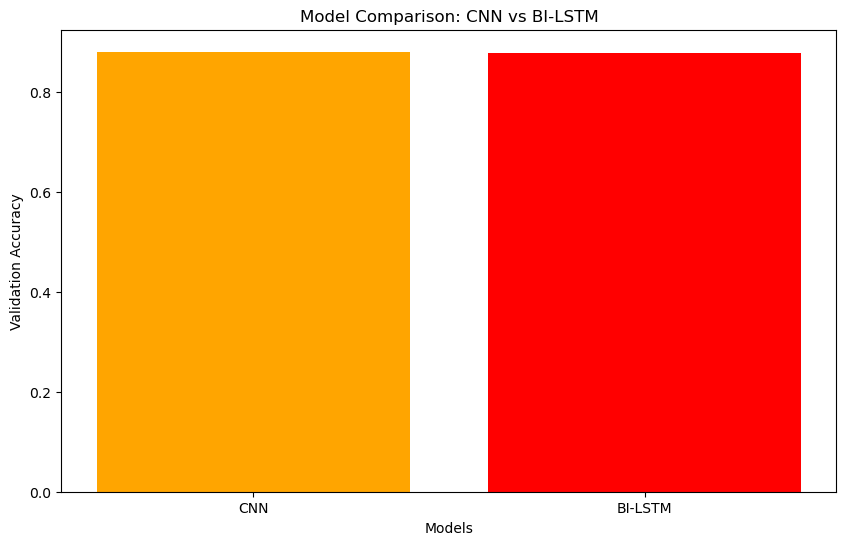

In [52]:
models = ['CNN','BI-LSTM']
val_accuracies = [cnn_val_acc,bilstm_acc]

plt.figure(figsize=(10,6))
plt.bar(models, val_accuracies, color=['orange','red'])
plt.xlabel('Models')
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison: CNN vs BI-LSTM')
plt.show()

## 🔮 Prediction Function for Deep Learning Models

Create a utility function to predict sentiment on new text using the trained deep learning model.

In [44]:
def predict_sentiment(df, text_column, tokenizer, model, max_length, threshold=0.7):
    # Convert the text to sequences
    sequences = tokenizer.texts_to_sequences(df[text_column].values)
    # Pad the sequences
    padded = pad_sequences(sequences, padding='post', maxlen=max_length)
    # Predict labels
    predictions = model.predict(padded)
    df['predicted_sentiment'] = [1 if p >= threshold else 0 for p in predictions]
    return df

# 🎯 Summary and Conclusions

## 📊 Models Implemented:

### Traditional Machine Learning:
- **SVM (Support Vector Machine)** - Linear kernel with TF-IDF features
- **KNN (K-Nearest Neighbors)** - k=5 neighbors
- **Naive Bayes** - Multinomial variant for text classification

### Deep Learning:
- **Bidirectional LSTM** - Sequential model with dropout and dense layers
- **CNN (Convolutional Neural Network)** - 1D convolution for text processing

## 💾 Saved Models and Components:
- `svm_sentiment.pkl` - Trained SVM model
- `tfidf_vectorizer.pkl` - TF-IDF vectorizer for feature extraction
- `tokenizer.pkl` - Keras tokenizer for deep learning models
- `best_model.h5` - Best performing deep learning model

## 🔍 Key Features:
- Comprehensive Arabic/Darija text preprocessing
- Emoji and special character handling
- Stopwords removal (Arabic + Darija)
- Text normalization and cleaning
- Model performance comparison and visualization

## 📈 Usage:
The notebook provides end-to-end sentiment analysis pipeline from raw text to trained models, suitable for Arabic/Darija sentiment classification tasks.